In [47]:
import pandas as pd
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# CANDIDATE NUMBER: 23467

## Introduction


The datasets used in this notebook are the `47tuc_positions` and the `47tuc_gaia_data`. These datasets contain information on the stars in the globular cluster 47 Tuc.

## Data Analysis

This analysis uses the `47tuc_positions` and `47tuc_gaia_data` datasets, which contain the original, raw data.

All the data given was read using pandas into two different dataframes. The first dataframe `positions` was for all the 47tuc positions, and `gaia_data` was for the 47tuc gaia data. The excel files with the data were held in my desktop, that's why ./Desktop/ is put prior to the names of the csv files.

In [48]:
positions = pd.read_csv('./Desktop/47tuc_positions.csv')
gaia_data = pd.read_csv('./Desktop/47tuc_gaia_data.csv')

In [49]:
positions.head()

,source_id,ra,dec,r_est
0,4689544567094557440,5.575178,-72.502891,2497.265269
1,4689541955754300672,4.999976,-72.646056,2181.867979
2,4689541234199794816,5.225171,-72.642103,2503.651243
3,4689544017338680832,5.331235,-72.556081,1994.822273
4,4689544498377649920,5.580270,-72.515469,2083.603799


In [50]:
gaia_data.head()

,source_id,ra,dec,phot_g_mean_mag,bp_rp,pmra,pmdec
0,4689544567094557440,5.575178,-72.502891,18.642883,0.965523,4.950253,-1.995966
1,4689541955754300672,4.999976,-72.646056,19.119717,1.259825,0.715769,-1.697977
2,4689541234199794816,5.225171,-72.642103,18.516747,1.046042,10.724800,-2.139549
3,4689544017338680832,5.331235,-72.556081,19.336916,1.018908,-0.342772,-1.584548
4,4689544498377649920,5.580270,-72.515469,19.275023,1.142059,0.022935,-1.184934


After all the data was read, a new dataframe `data` was defined in which the two dataframes were merged, while simultaneously removing all the repeating columns of data.

In [51]:
data = pd.merge(left=positions, right=gaia_data, on=['dec','ra','source_id'], how='left')

In [52]:
data.head()

,source_id,ra,dec,r_est,phot_g_mean_mag,bp_rp,pmra,pmdec
0,4689544567094557440,5.575178,-72.502891,2497.265269,18.642883,0.965523,4.950253,-1.995966
1,4689541955754300672,4.999976,-72.646056,2181.867979,19.119717,1.259825,0.715769,-1.697977
2,4689541234199794816,5.225171,-72.642103,2503.651243,18.516747,1.046042,10.724800,-2.139549
3,4689544017338680832,5.331235,-72.556081,1994.822273,19.336916,1.018908,-0.342772,-1.584548
4,4689544498377649920,5.580270,-72.515469,2083.603799,19.275023,1.142059,0.022935,-1.184934


Having merged all the data into a sinle dataframe, a plot using the imported matplotlib.pyplot function was created. 

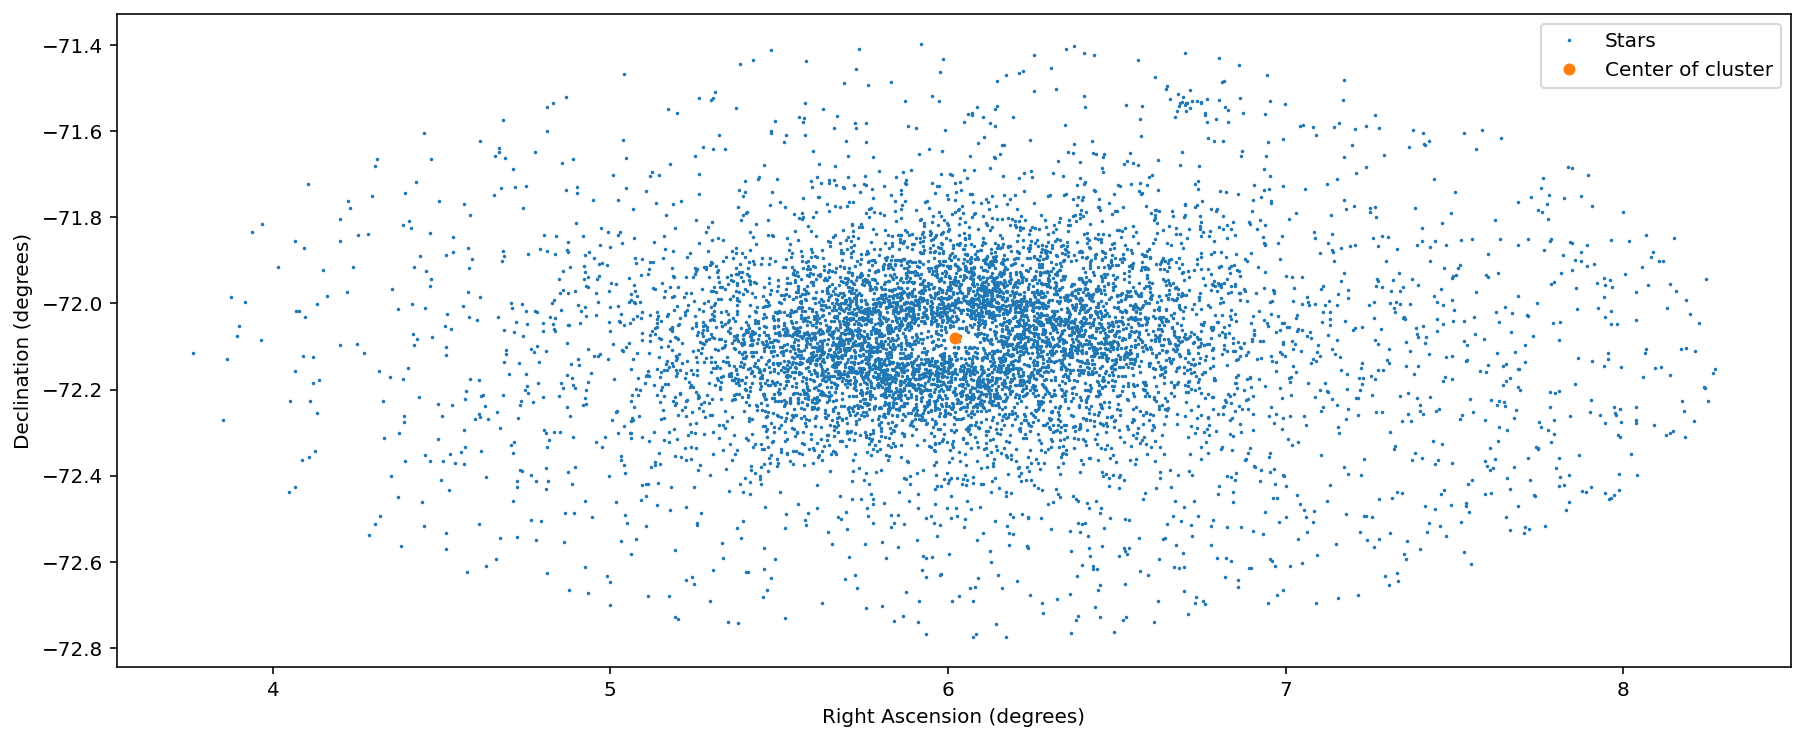

In [53]:
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(1,1,1)
ax.plot(data['ra'], data['dec'], '.', markersize=1.5, label='Stars')
ax.plot(6.022, -72.081, '.', markersize=10, label='Center of cluster')
ax.set_xlabel('Right Ascension (degrees)')
ax.set_ylabel('Declination (degrees)')
ax.legend()
plt.show()

**Figure 1.** Scatter plot of the Right Ascension versus the Declination for each star (blue circles) in the 47 Tuc globular cluster. The center of the cluster is clearly marked with an orange dot.

A function called `angle_distance` was defined which was made to take an input of an index of a star. Using the index the function finds the corresponding right ascension and declination angle. It then finds the difference from the center of the cluster for each angle and finds the square root of the sum of the square of both angles (Pythagoras). After doing that it outputs that value.

In [54]:
def angle_distance(i):
    x = data.loc[i].ra - 6.022
    y = data.loc[i].dec + 72.081 
    value = np.sqrt(x*x + y*y)
    return(value)

An arrary called `bad` was created. Afterward, i (index) was interated between 0 and 7834 (Total number of data rows - 1) checking if the distance from the center of the star cluster was greater than 0.6. If it was then the index was appended to the bad array. Then a new dataframe called `newdata` was defined as the old data but with all the rows with the indexes found in the bad array removed. This only left the stars that are within the chosen radius of 0.6.

In [55]:
bad = []

for i in range(0,7834):
    if angle_distance(i) > 0.6:
        bad.append(i)
        
newdata = data.drop(bad)   

Using the selected stars. A plot was made of B - R Colour versus Apparent Magnitude.

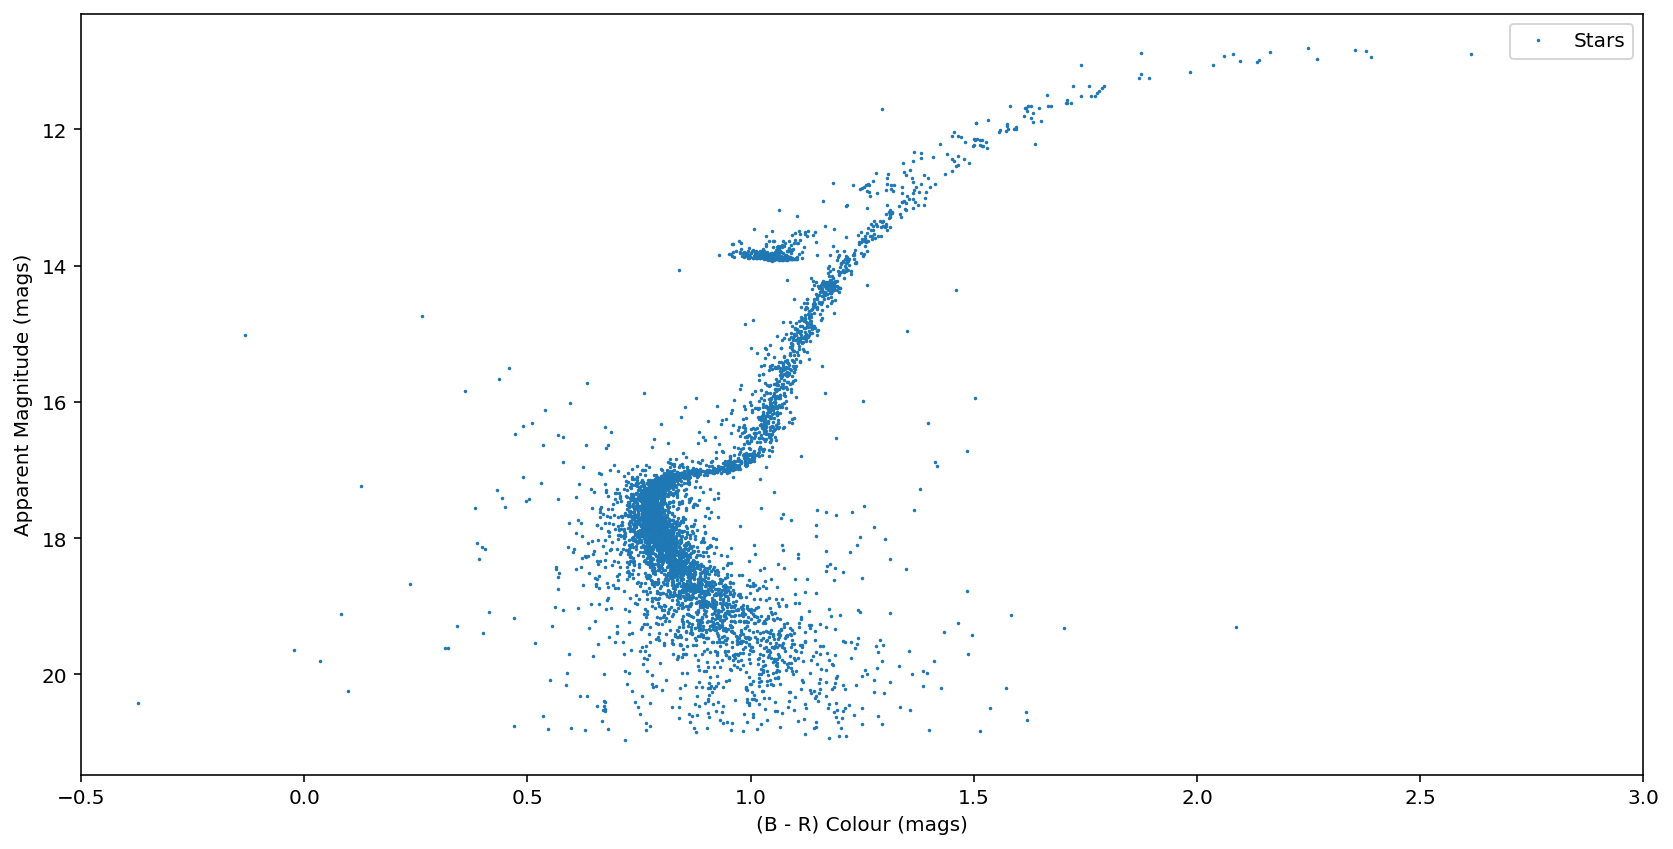

In [56]:
fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot(1,1,1)
ax.plot(newdata['bp_rp'], newdata['phot_g_mean_mag'], '.', markersize=1.5, label='Stars')
ax.set_xlabel('(B - R) Colour (mags)')
ax.set_ylabel('Apparent Magnitude (mags)')
ax.invert_yaxis()
ax.set_xlim(-0.5,3)
ax.legend()
plt.show()

**Figure 2.** Scatter plot of Apparent Magnitude versus (B - R) Colour for the selected stars in the 47 Tuc globular cluster within the chosen radius of 0.6 degrees.

Combining the two equations:

\begin{equation}
μ = m − M⠀(1)
\end{equation}

\begin{equation}
μ = 5 log10 d − 5⠀(2)
\end{equation}

where $μ$ is the distance modulus, $M$ is the absolute magnitude, $m$ is the apparent magnitude and $d$ is the
distance in parsecs the following equation was achieved:

\begin{equation}
M = m - 5 log10 d − 5⠀(3)
\end{equation}

A new array `absolute_mag` was defined for absolute magnitude which used the apparent magnitudes `phot_g_mean_mag` and the distance to the stars in parsecs `r_est` in the newdata dataframe to work out the absolute magnitudes using equation 3.

The same plot was made as in figure 2, only exchanging apparent magnitude with absolute magnitude in the y-axis.

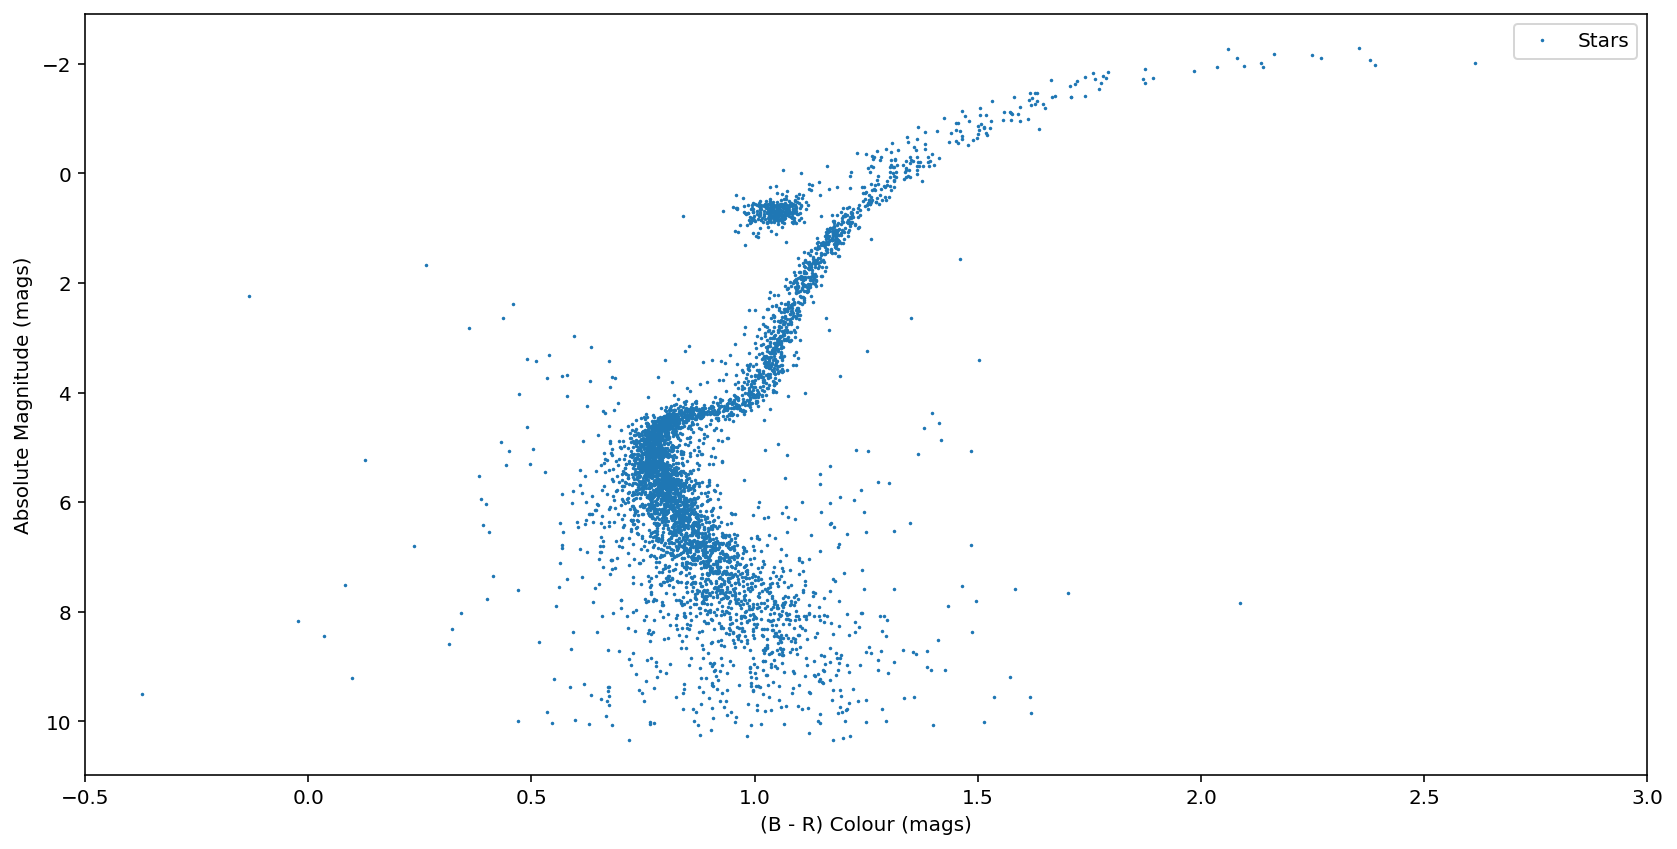

In [57]:
absolute_mag = newdata.phot_g_mean_mag - ((5 * (np.log10(newdata.r_est))) - 5)

fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot(1,1,1)
ax.plot(newdata['bp_rp'], absolute_mag, '.', markersize=1.5, label='Stars')
ax.set_xlabel('(B - R) Colour (mags)')
ax.set_ylabel('Absolute Magnitude (mags)')
ax.invert_yaxis()
ax.set_xlim(-0.5,3)
ax.legend()
plt.show()

**Figure 3.** Scatter plot of (B - R) Colour versus Absolute Magnitude for the selected stars in the 47 Tuc globular cluster within the chosen radius of 0.6 degrees

Using the equation for luminosity

\begin{equation}
L⨀= 10^{(M⨀-M)/2.5}⠀(4)                                      
\end{equation}

where $L⨀$ is luminosity in solar luminosities, $M⨀$ = 4.81 and is the absolute magnitude of the sun, and . The equation for effectve temperature is

\begin{equation}
Teff = 4600( (1/(0.92(B - R) + 1.7)) + (1/(0.92(B - R) + 0.62)) )⠀(5)
\end{equation}

where $Teff$ is the effective temperature and  $(B-V)$ is the star’s colour.

Two new arrarys were created `luminosity` and `effective_temp` using the previous arrary for absolute magnitude `absolute_mag` and (B - R) colour `bp_rp` found in the newdata dataframe and by using equations 4 and 5.

Then a plot of effective temperature versus luminosity was plotted known as a HR diagram.

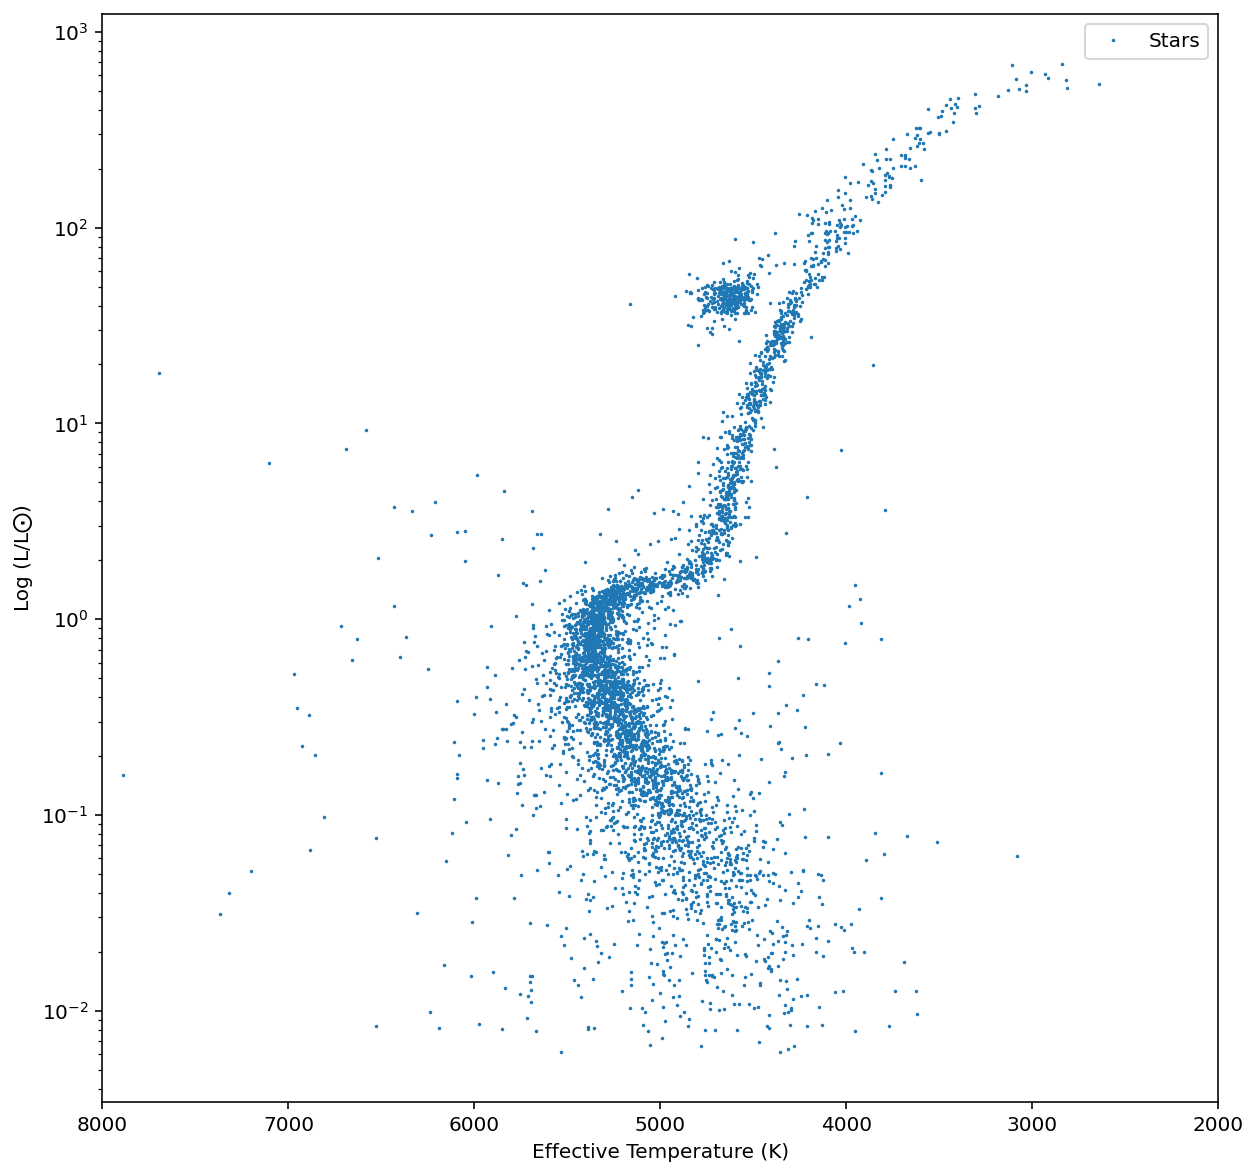

In [58]:
luminosity = 10**((4.81-absolute_mag)/2.5)
effective_temp = 4600*((1/(0.92*newdata.bp_rp+1.7)) + (1/(0.92*newdata.bp_rp+0.62)))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.plot(effective_temp, luminosity, '.', markersize=1.5, label='Stars')
ax.set_xlabel('Effective Temperature (K)')
ax.set_ylabel('Log (L/L⨀)')
ax.invert_xaxis()
ax.set_yscale('log')
ax.set_xlim(8000,2000)
ax.legend()
plt.show()

**Figure 4.** Scatter plot of the Effective temperature versus the log of the luminosity for the selected stars in the 47 Tuc globular cluster within the chosen radius of 0.6 degrees.

Luminosity, temperature and stellar radius are related by the equation

\begin{equation}
R/R⨀ = √( (L/L⨀)/(Teff/Teff⨀)^4 )⠀(6)
\end{equation}

where $Teff⨀$ = 5756 K. Using equation 6 and substituting 5756 K for 𝑇eff⨀ the stellar radius in solar radii was worked out for each star in the dataframe.

Using this an identical plot as shown in figure 4 was made, however a colorbar was added to it showing the radius of each star.

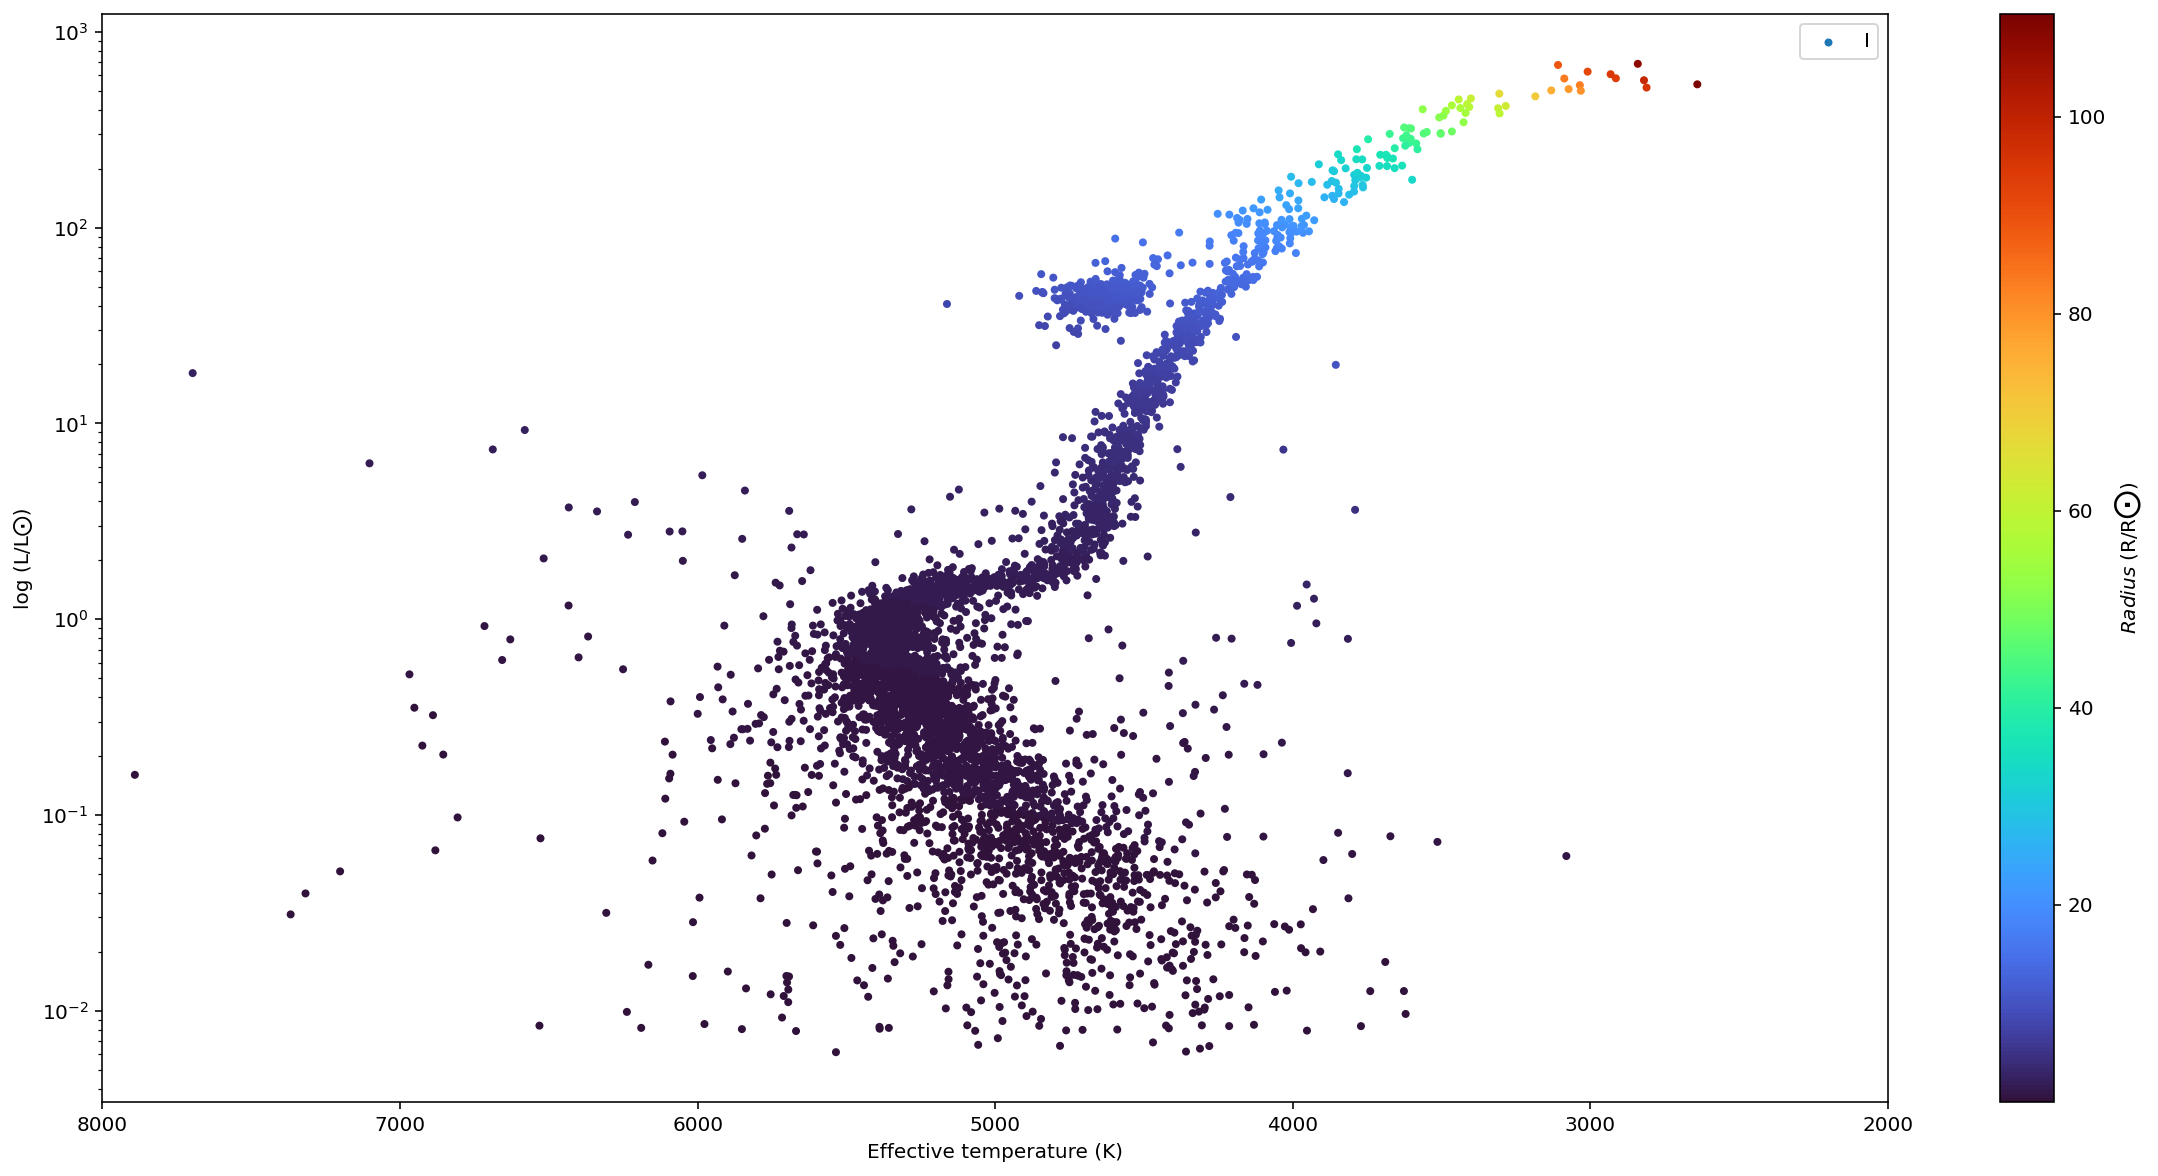

In [59]:
radius = np.sqrt(luminosity/((effective_temp/5756)**4))

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
cm = plt.cm.get_cmap('turbo')
sc = ax.scatter(effective_temp, luminosity, c=radius, marker='.', label='I', cmap=cm)

ax.set_xlabel('Effective temperature (K)')
ax.set_ylabel('log (L/L⨀)')
ax.invert_xaxis()
ax.set_yscale('log')
ax.set_xlim(8000,2000)
ax.legend()

cbar = plt.colorbar(sc)
cbar.set_label('$Radius$ (R/R⨀)')
plt.show()

**Figure 5.** Scatter plot of the Effective temperature versus the log of the luminosity for the selected stars in the 47 Tuc globular cluster within the chosen radius of 0.6 degrees. There is a colorbar added, showing the solar radius of each star in solar radii. The majority of stars on the plot have a solar radius of <20 R⨀.

## Conclusion

From the scatter plots we can conclude that the 47 Tuc globular cluster is a typical middle aged cluster with the majority of its stars falling on the main sequence. The cluster has a few red giants with practically no blue as the region >6000 K and > 1 L⨀ is practically empty, with very few stars.